# Data Understanding

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ○ Load the dataset and inspect the first few rows to understand its structure. 
df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
df.head()

/tmp/ipykernel_447/1278066084.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
df.shape

(128975, 24)

In [6]:
# Check the data types of each column and identify any potential issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
#Generate summary statistics for numerical and categorical variables.
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
#including columns with a data type "object"
df.describe(include = 'O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [9]:
df.duplicated().sum()

0

In [10]:
#unique values for each col
print(df.apply(lambda col: col.unique()))

index                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5

In [11]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [12]:
# Identify columns with missing values and decide on appropriate strategies to handle them (e.g., imputation, removal)

In [13]:
df.drop(columns=['Unnamed: 22'],inplace=True)
df.drop(columns=['index'],inplace=True)
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [14]:
#showing null and imputate it
df['Courier Status'].value_counts()

Courier Status
Shipped      109487
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

/tmp/ipykernel_447/3512638271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('Unknown', inplace=True)


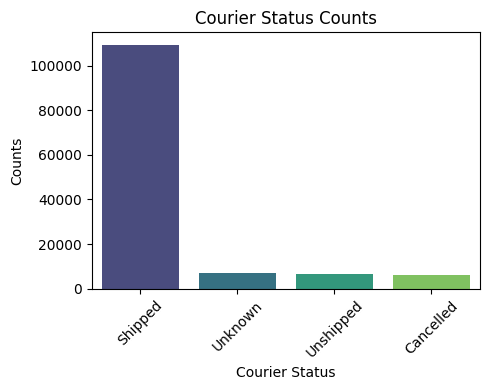

In [15]:
df['Courier Status'].fillna('Unknown', inplace=True)
status_counts=df['Courier Status'].value_counts(dropna=False)
plt.figure(figsize=(5, 4))  
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')  
plt.title('Courier Status Counts')
plt.xlabel('Courier Status')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show();

In [16]:
#filling null in 'currency'
mode_value = df['currency'].mode()[0]
df['currency'].fillna(mode_value, inplace=True)
# Print the unique values in the 'currency' column
print(df['currency'].unique())

['INR']


/tmp/ipykernel_447/1933004951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna(mode_value, inplace=True)


resulting that 'INR' is the only unique value in the 'currency' column after imputation.

In [17]:
#filling null in 'Amount'
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
df['Amount'] = imputer_mean.fit_transform(df[['Amount']])

In [18]:
#To get the total number of sales
sales = df.describe(include='O').loc['unique','Order ID']
total_quantity = df['Qty'].sum()
total_amount = df['Amount'].sum()

print('Total number of sales is :',sales)
print('Total Quantity:',total_quantity)
print('Total Amount:',total_amount)

Total number of sales is : 120378
Total Quantity: 116649
Total Amount: 83648214.91782884


In [19]:
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)

/tmp/ipykernel_447/1021440983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna('unknown', inplace = True)
/tmp/ipykernel_447/1021440983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [20]:
# Group by 'ship-city' and sum 'Qty'
sales_by_city = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False)
sales_by_city

ship-city
BENGALURU                  10422
HYDERABAD                   7333
MUMBAI                      5650
NEW DELHI                   5252
CHENNAI                     4937
                           ...  
Sanvordem                      0
Koothattukulam                 0
Rayya, Amritsar                0
Redhills                       0
Secunderabad, HYDERABAD        0
Name: Qty, Length: 8956, dtype: int64

In [21]:
sales_by_city = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False)

# Print the top shipping cities
top_cities = sales_by_city.head(5)  # Adjust number as needed
print("Top Shipping Cities:")
print(top_cities)

Top Shipping Cities:
ship-city
BENGALURU    10422
HYDERABAD     7333
MUMBAI        5650
NEW DELHI     5252
CHENNAI       4937
Name: Qty, dtype: int64


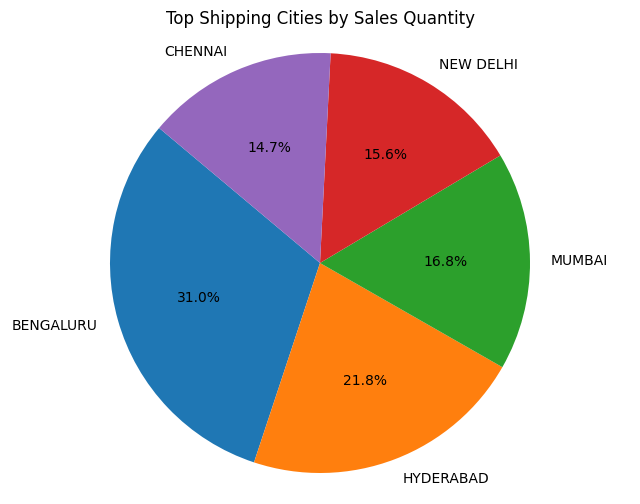

In [22]:
plt.figure(figsize=(8, 6))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Shipping Cities by Sales Quantity')
plt.axis('equal')  
plt.show()

In [23]:
sales_by_state = df.groupby('ship-state')['Qty'].sum().sort_values(ascending=False)

# Print the top shipping cities
top_states = sales_by_state.head(5)  # Adjust number as needed
print("Top Shipping states:")
print(top_states)

Top Shipping states:
ship-state
MAHARASHTRA      20328
KARNATAKA        15901
TAMIL NADU       10412
TELANGANA        10253
UTTAR PRADESH     9499
Name: Qty, dtype: int64


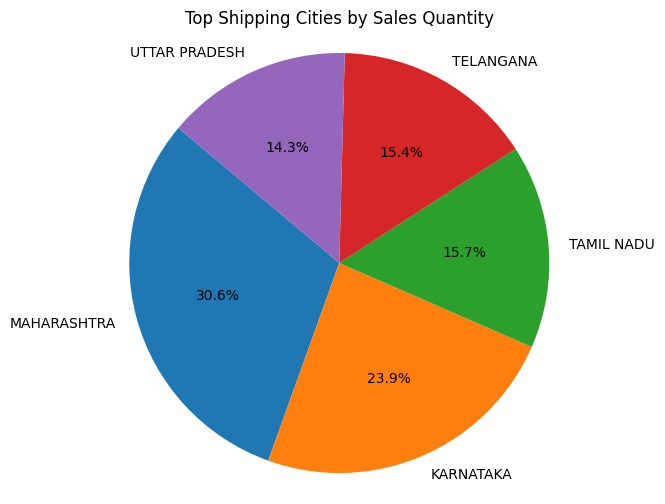

In [24]:
plt.figure(figsize=(8, 6))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Shipping Cities by Sales Quantity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [25]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

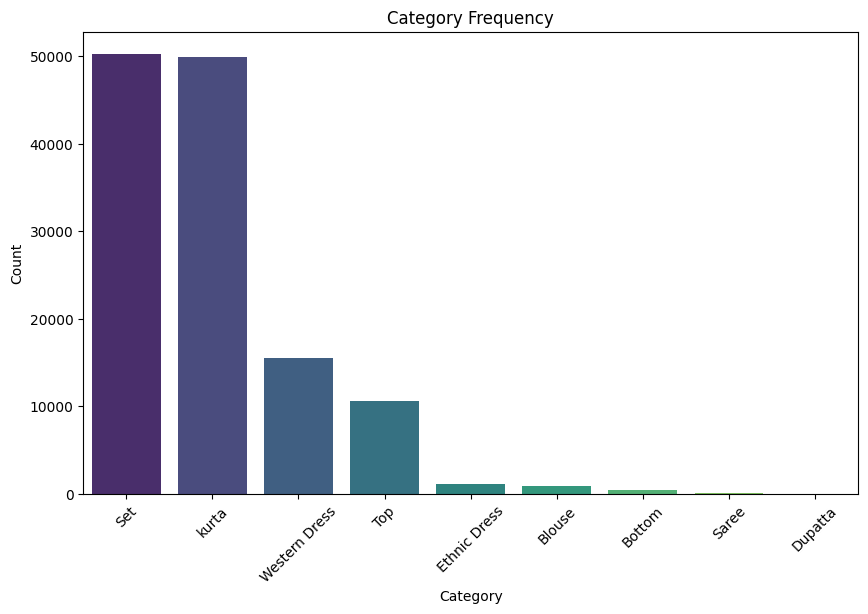

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Category', y='Count',palette="viridis")
plt.title('Category Frequency')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

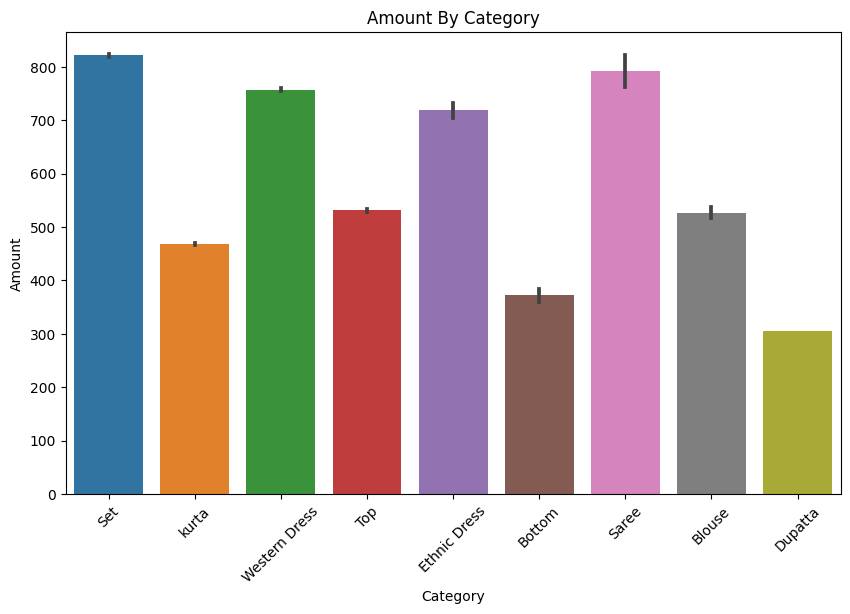

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Amount')
plt.title('Amount By Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['month'].unique()

/tmp/ipykernel_447/1672301062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


array([4, 3, 5, 6], dtype=int32)

In [29]:
months = ['march','April', 'May', 'June']
df['month'].replace([3,4,5,6],months, inplace = True)

/tmp/ipykernel_447/2189357847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['month'].replace([3,4,5,6],months, inplace = True)


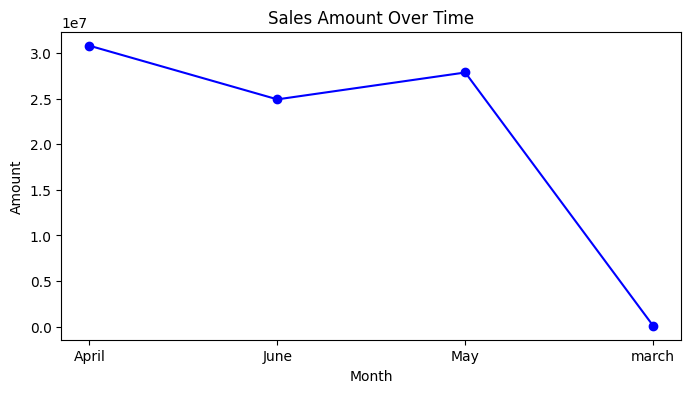

In [30]:
monthly_amounts = df.groupby('month')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(monthly_amounts['month'], monthly_amounts['Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Sales Amount Over Time')
plt.xticks(rotation=0);

In [31]:
 df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [32]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

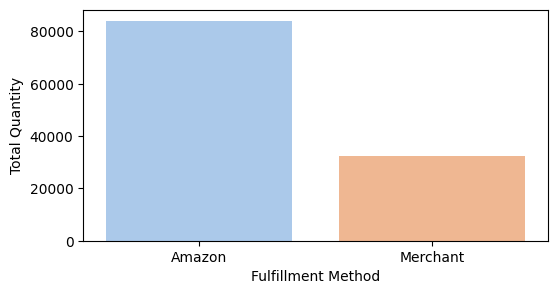

In [33]:
plt.figure(figsize=(6,3))
full_method= df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
sns.barplot(x=full_method.index, y=full_method.values, palette='pastel')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity')
plt.show()

In [34]:
df.columns = df.columns.str.strip()
df['Sales Channel'].value_counts()

Sales Channel
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

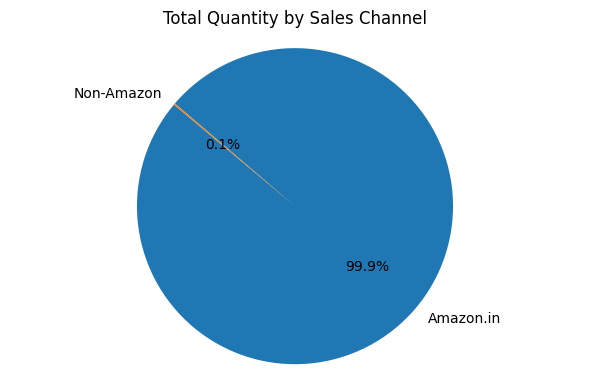

In [35]:
plt.figure(figsize=(6,4))
sales_channel= df.groupby('Sales Channel')['Qty'].sum().sort_values(ascending=False)

plt.pie(sales_channel.values, labels=sales_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Quantity by Sales Channel')
plt.axis('equal')  
plt.tight_layout()  
plt.show()

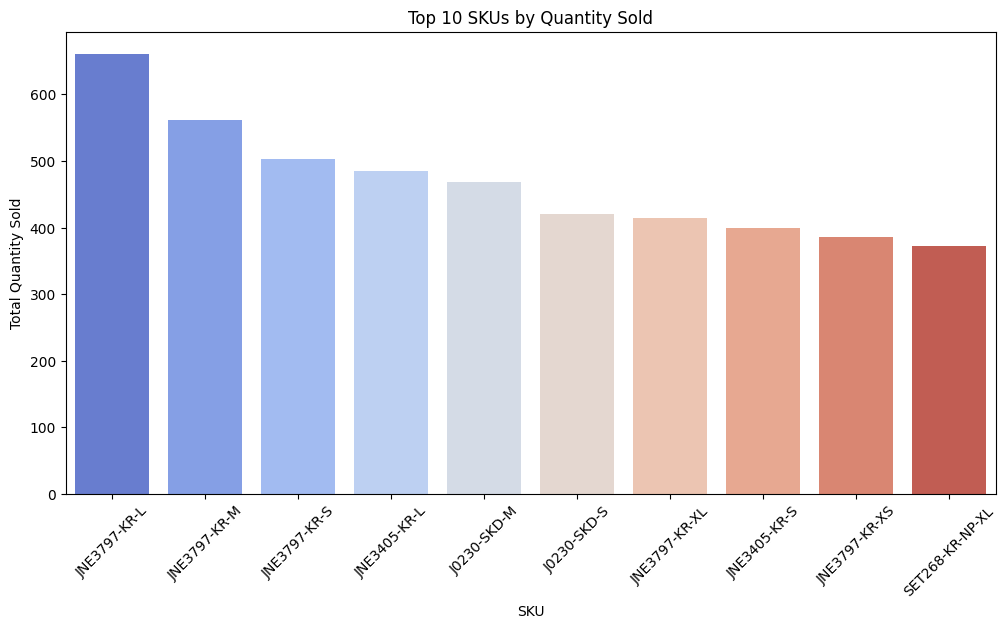

In [36]:
top_skus = df.groupby('SKU')['Qty'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skus.index, y=top_skus.values, palette='coolwarm')
plt.title('Top 10 SKUs by Quantity Sold')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

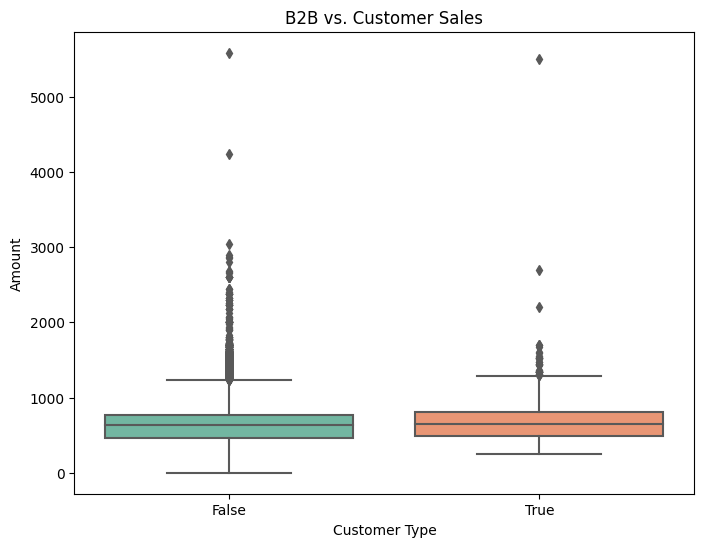

In [37]:
 #B2B vs. Customer Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='B2B', y='Amount', data=df, palette='Set2')
plt.title('B2B vs. Customer Sales')
plt.xlabel('Customer Type')
plt.ylabel('Amount')
plt.show()

In [38]:
# ML Model

In [39]:
y = df['Courier Status']
X = df.drop(columns=['Courier Status','Status','Order ID', 'Date'], axis=1)

In [47]:
X = df.drop(columns=['promotion-ids','Style','Order ID', 'Date','Courier Status','Status'], axis=1)

In [ ]:
# Columns to create dummy variables for changing category to numerical 
columns_to_dummify = ['Fulfilment', 'Sales Channel', 'ship-service-level',  'SKU', 
                      'Category', 'Size', 'Qty', 'currency', 'Amount', 'ship-city', 
                      'ship-state', 'ship-postal-code', 'ship-country',  
                      'B2B', 'fulfilled-by', 'month']

df_with_dummies = pd.get_dummies(X, columns=columns_to_dummify)

# Display the first few rows of the transformed dataset
df_with_dummies.head()


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_with_dummies, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))